# For my work today, I am using the solutions that were provided to us for the Voting Classifier as an outline for todays evaluation of my data. 

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/PTDataScience/Final Project/FitTripCodingDojoDataSet__subSetV2.csv',index_col = '_id' )
df.head()

,firstName,lastName,birthday,age,age_brackets,creationDa,emailAddr,gender,weight_lbs,height_inches,have_workouts,bmi,bmi_descript
_id,,,,,,,,,,,,,
60359822b9d47ea04970c156,Shanmugam,130.64,3/1/84,37,30s,NaN,-,22421.0,149,748,Yes,0.19,Underweight
532a10486882f3c50900e2f2,Jonathan,Hoffman,12/28/61,60,60s,3/19/14,JONHOFPT@YAHOO.COM,1.0,2,68,Yes,0.30,Underweight
542473054698151763c7daf4,Barbara,Foti,7/17/70,51,50s,9/25/14,BARBARA.FOTI@ME.COM,0.0,77,108,No,4.64,Underweight
53d4244dedf38dfe09845a9d,Ahmed,Ali,9/2/83,38,30s,7/26/14,FRAZDQVIP@YAHOO.COM,0.0,77,108,No,4.64,Underweight
53c31018973db4e650e2d331,Mario,Kovacev,7/13/88,33,30s,7/13/14,MARIO.KOVACEV@OUTLOOK.COM,1.0,77,108,No,4.64,Underweight


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   firstName      34703 non-null  object 
 1   lastName       33848 non-null  object 
 2   birthday       38812 non-null  object 
 3   age            38812 non-null  int64  
 4   age_brackets   38812 non-null  object 
 5   creationDa     38810 non-null  object 
 6   emailAddr      38812 non-null  object 
 7   gender         38808 non-null  float64
 8   weight_lbs     38812 non-null  int64  
 9   height_inches  38812 non-null  int64  
 10  have_workouts  38812 non-null  object 
 11  bmi            38812 non-null  float64
 12  bmi_descript   38812 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.1+ MB


In [4]:
#filters
filter_male = df['gender'] == 1
filter_female = df['gender'] == 0

filter_30s = df['age_brakets'] = '30s'
filter_40s = df['age_brakets'] = '40s'
filter_50s = df['age_brakets'] = '50s'

filter_overweight = df['bmi_descript'] == 'Overweight'



## Workouts

In [5]:
df['have_workouts'].value_counts()

No     31470
Yes     6776
yes      566
Name: have_workouts, dtype: int64

In [6]:
df['have_workouts'] = df['have_workouts'].replace({'yes': 'Yes'})
df['have_workouts'].value_counts()

No     31470
Yes     7342
Name: have_workouts, dtype: int64

In [7]:
filter_have_workouts = df['have_workouts'] == 'Yes'

In [8]:
df_workouts = df.loc[filter_have_workouts,:]
df_workouts.head()

,firstName,lastName,birthday,age,age_brackets,creationDa,emailAddr,gender,weight_lbs,height_inches,have_workouts,bmi,bmi_descript,age_brakets
_id,,,,,,,,,,,,,,
60359822b9d47ea04970c156,Shanmugam,130.64,3/1/84,37,30s,NaN,-,22421.0,149,748,Yes,0.19,Underweight,50s
532a10486882f3c50900e2f2,Jonathan,Hoffman,12/28/61,60,60s,3/19/14,JONHOFPT@YAHOO.COM,1.0,2,68,Yes,0.30,Underweight,50s
6083b89cbfd12b8b78b900e8,Azad,Sindî,4/3/93,28,20s,4/24/21,XURTE.SINDI993@GMAIL.COM,1.0,91,108,Yes,5.48,Underweight,50s
5f849a5b625277485fdb0dfc,Anan,Topik,4/4/10,11,20s,10/12/20,CERENTOPRAKBAYGIN@HOTMAIL.COM,1.0,102,102,Yes,6.89,Underweight,50s
53909ef77201f8017bcc7168,Maria Cristina,Guedes Socorro,9/10/95,26,20s,6/5/14,CRISTINA_10_1995@HOTMAIL.COM,0.0,80,90,Yes,6.94,Underweight,50s


No     31470
Yes     7342
Name: have_workouts, dtype: int64
['No', 'Yes']
[31470, 7342]


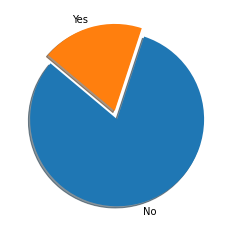

In [9]:
workouts = df["have_workouts"].value_counts()
print(workouts)
print(workouts.index.values.tolist())
print(workouts.values.tolist())
labels = workouts.index.values.tolist()
values = workouts.values.tolist()
explode = (.05,.05)
plt.pie(values, explode=explode, labels=labels,  shadow=True, startangle=140)
plt.show();

In [10]:
df['have_workouts'] = df['have_workouts'].replace({'Yes': 1})
df['have_workouts'] = df['have_workouts'].replace({'No': 0})
df['have_workouts'].value_counts()

0    31470
1     7342
Name: have_workouts, dtype: int64

In [11]:
age_class = df["age_brackets"].value_counts()
print(age_class)

40s        12735
50s        11307
30s         7403
60s         4954
20s         2154
Over 70      259
Name: age_brackets, dtype: int64


In [12]:
print(age_class.index.values.tolist())
print(age_class.values.tolist())

['40s', '50s', '30s', '60s', '20s', 'Over 70']
[12735, 11307, 7403, 4954, 2154, 259]


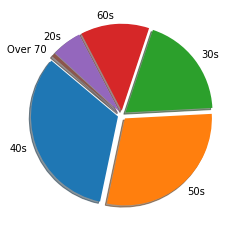

In [13]:
labels = age_class.index.values.tolist()
values = age_class.values.tolist()
explode = (.05,.05,.05,.05,.05,.05)
plt.pie(values, explode=explode, labels=labels,  shadow=True, startangle=140)
plt.show()

In [14]:
# workouts = yes
workouts_yes = df_workouts["age_brackets"].value_counts()
print(workouts_yes)


40s        2418
50s        2250
30s        1296
60s        1007
20s         331
Over 70      40
Name: age_brackets, dtype: int64


In [15]:
print(workouts_yes.index.values.tolist())
print(workouts_yes.values.tolist())

['40s', '50s', '30s', '60s', '20s', 'Over 70']
[2418, 2250, 1296, 1007, 331, 40]


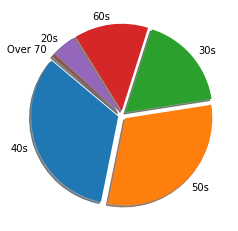

In [16]:
labels = workouts_yes.index.values.tolist()
values = workouts_yes.values.tolist()
explode = (.05,.05,.05,.05,.05,.05)
plt.pie(values, explode=explode, labels=labels,  shadow=True, startangle=140)
plt.show()

In [17]:
bmi_class = df_workouts["bmi_descript"].value_counts()
print(bmi_class)

Normal             3388
Overweight         2467
Obese               842
Extremely Obese     329
Underweight         316
Name: bmi_descript, dtype: int64


In [18]:
print(bmi_class.index.values.tolist())
print(bmi_class.values.tolist())

['Normal', 'Overweight', 'Obese', 'Extremely Obese', 'Underweight']
[3388, 2467, 842, 329, 316]


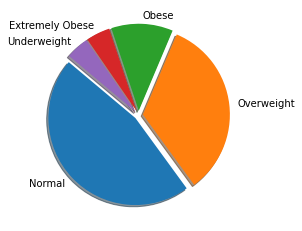

In [19]:
labels = bmi_class.index.values.tolist()
values = bmi_class.values.tolist()
explode = (.05,.05,.05,.05,.05)
plt.pie(values, explode=explode, labels=labels,  shadow=True, startangle=140)
plt.show()

In [20]:
import seaborn as sns

# DATA CLEANNING


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   firstName      34703 non-null  object 
 1   lastName       33848 non-null  object 
 2   birthday       38812 non-null  object 
 3   age            38812 non-null  int64  
 4   age_brackets   38812 non-null  object 
 5   creationDa     38810 non-null  object 
 6   emailAddr      38812 non-null  object 
 7   gender         38808 non-null  float64
 8   weight_lbs     38812 non-null  int64  
 9   height_inches  38812 non-null  int64  
 10  have_workouts  38812 non-null  int64  
 11  bmi            38812 non-null  float64
 12  bmi_descript   38812 non-null  object 
 13  age_brakets    38812 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 4.4+ MB


In [22]:
df.drop(columns= 'firstName',inplace =True)
df.drop(columns= 'lastName',inplace=True)
df.drop(columns='creationDa',inplace=True)
df.drop(columns='emailAddr', inplace =True)
df.drop(columns= 'birthday',inplace = True)
df.drop(columns= 'age_brakets',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            38812 non-null  int64  
 1   age_brackets   38812 non-null  object 
 2   gender         38808 non-null  float64
 3   weight_lbs     38812 non-null  int64  
 4   height_inches  38812 non-null  int64  
 5   have_workouts  38812 non-null  int64  
 6   bmi            38812 non-null  float64
 7   bmi_descript   38812 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.7+ MB


In [23]:
df['weight_lbs'].fillna(value= 0, inplace=True)
df['height_inches'].fillna(value= 0, inplace=True)
df['gender'].fillna(value= "Male", inplace=True)

In [24]:

df['gender'] = df['gender'].replace({22421.0: 1})
df['gender'].value_counts()

1       26105
0.0     12703
Male        4
Name: gender, dtype: int64

In [25]:
df['gender'].value_counts()

1       26105
0.0     12703
Male        4
Name: gender, dtype: int64

In [26]:
df['gender'] = df['gender'].replace({1 : 'Male'})
df['gender'] = df['gender'].replace({0: 'Female'})
df['gender'].value_counts()

Male      26109
Female    12703
Name: gender, dtype: int64

In [27]:
df = pd.get_dummies(data = df, columns = ["bmi_descript",'age_brackets','gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           38812 non-null  int64  
 1   weight_lbs                    38812 non-null  int64  
 2   height_inches                 38812 non-null  int64  
 3   have_workouts                 38812 non-null  int64  
 4   bmi                           38812 non-null  float64
 5   bmi_descript_Extremely Obese  38812 non-null  uint8  
 6   bmi_descript_Normal           38812 non-null  uint8  
 7   bmi_descript_Obese            38812 non-null  uint8  
 8   bmi_descript_Overweight       38812 non-null  uint8  
 9   bmi_descript_Underweight      38812 non-null  uint8  
 10  age_brackets_20s              38812 non-null  uint8  
 11  age_brackets_30s              38812 non-null  uint8  
 12  age_brackets_40s       

In [28]:
#df["bmi_descript"] = df["bmi_descript"].replace({'Underweight': 0})
#df['bmi_descript'] = df['bmi_descript'].replace({'Normal': 1})
#df['bmi_descript'] = df['bmi_descript'].replace({'Overweight': 2})
#df['bmi_descript'] = df['bmi_descript'].replace({'Obese': 3})
#df['bmi_descript'] = df['bmi_descript'].replace({'Extremely Obese': 4})
#df['bmi_descript'].value_counts()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           38812 non-null  int64  
 1   weight_lbs                    38812 non-null  int64  
 2   height_inches                 38812 non-null  int64  
 3   have_workouts                 38812 non-null  int64  
 4   bmi                           38812 non-null  float64
 5   bmi_descript_Extremely Obese  38812 non-null  uint8  
 6   bmi_descript_Normal           38812 non-null  uint8  
 7   bmi_descript_Obese            38812 non-null  uint8  
 8   bmi_descript_Overweight       38812 non-null  uint8  
 9   bmi_descript_Underweight      38812 non-null  uint8  
 10  age_brackets_20s              38812 non-null  uint8  
 11  age_brackets_30s              38812 non-null  uint8  
 12  age_brackets_40s       

# MODEL

In [30]:
# define x and y

X =df.drop(columns = ['have_workouts', 'bmi'])
y = df['have_workouts']

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, stratify = y)

In [32]:

y_test.value_counts(normalize = True)


0    0.810883
1    0.189117
Name: have_workouts, dtype: float64

### library Imports

In [33]:
# imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# establish a pipeline for each default model
dt_pipe = make_pipeline(DecisionTreeClassifier(random_state = 42))    # tree models do not need to be scaled

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

log_pipe = make_pipeline(StandardScaler(), LogisticRegression())


In [34]:
# fit each model and find the accuracy
dt_pipe.fit(X_train, y_train)
print('DT Training Accuracy:', accuracy_score(y_train, dt_pipe.predict(X_train)))
print('DT Testing Accuracy:', accuracy_score(y_test, dt_pipe.predict(X_test)))

knn_pipe.fit(X_train, y_train)
print('KNN Training Accuracy:', accuracy_score(y_train, knn_pipe.predict(X_train)))
print('KNN Testing Accuracy:', accuracy_score(y_test, knn_pipe.predict(X_test)))

log_pipe.fit(X_train, y_train)
print('Log Training Accuracy:', accuracy_score(y_train, log_pipe.predict(X_train)))
print('Log Testing Accuracy:', accuracy_score(y_test, log_pipe.predict(X_test)))

DT Training Accuracy: 0.9399841973272871
DT Testing Accuracy: 0.7090590539008554
KNN Training Accuracy: 0.8260675392490295
KNN Testing Accuracy: 0.7767700711120272
Log Training Accuracy: 0.8108488783537737
Log Testing Accuracy: 0.8108832319901061


In [35]:
# hard voting classifier
# import voting classifierfrom sklearn.ensemble import VotingClassifier
combined_model_vote = VotingClassifier(estimators = [('dt', dt_pipe), ('knn', knn_pipe), ('log', log_pipe)])

combined_model_vote.fit(X_train, y_train)
print('Combined Training Accuracy:', accuracy_score(y_train, combined_model_vote.predict(X_train)))
print('Combined Testing Accuracy:', accuracy_score(y_test, combined_model_vote.predict(X_test)))

Combined Training Accuracy: 0.8387783846920196
Combined Testing Accuracy: 0.7920230856436153


In [36]:
# soft voting classifier
soft_model_vote = VotingClassifier(estimators = [('dt', dt_pipe), ('knn', knn_pipe), ('log', log_pipe)], voting = 'soft')
soft_model_vote.fit(X_train, y_train)
print('Soft Training Accuracy:', accuracy_score(y_train, soft_model_vote.predict(X_train)))
print('Soft Testing Accuracy:', accuracy_score(y_test, soft_model_vote.predict(X_test)))

Soft Training Accuracy: 0.8879727919200248
Soft Testing Accuracy: 0.7589405338555086


In [76]:
# Weighted voting classifier
weighted_model_vote = VotingClassifier(estimators = [('dt', dt_pipe), ('knn', knn_pipe), ('log', log_pipe)], voting = 'soft', weights = [1,1,2])
weighted_model_vote.fit(X_train, y_train)
print('Weighted Training Accuracy:', accuracy_score(y_train, weighted_model_vote.predict(X_train)))
print('Weighted Testing Accuracy:', accuracy_score(y_test, weighted_model_vote.predict(X_test)))

Weighted Training Accuracy: 0.8241437356144148
Weighted Testing Accuracy: 0.8025352983613315


In [71]:
print('Combined Training Accuracy:', accuracy_score(y_train, combined_model_vote.predict(X_train)))
print('Combined Testing Accuracy:', accuracy_score(y_test, combined_model_vote.predict(X_test)))

print('Soft Training Accuracy:', accuracy_score(y_train, soft_model_vote.predict(X_train)))
print('Soft Testing Accuracy:', accuracy_score(y_test, soft_model_vote.predict(X_test)))

print('Weighted Training Accuracy:', accuracy_score(y_train, weighted_model_vote.predict(X_train)))
print('Weighted Testing Accuracy:', accuracy_score(y_test, weighted_model_vote.predict(X_test)))

Combined Training Accuracy: 0.8387783846920196
Combined Testing Accuracy: 0.7920230856436153
Soft Training Accuracy: 0.8879727919200248
Soft Testing Accuracy: 0.7589405338555086
Weighted Training Accuracy: 0.8108488783537737
Weighted Testing Accuracy: 0.8108832319901061


7) Use the pipeline with gridsearchcv to to hypertune each of your models and/or your voting classifier and see if you can improve the accuracy.

In [38]:
# import 
from sklearn.model_selection import GridSearchCV

In [39]:
# check available hyperparameters to tune with the dt_pipe model...notice that these are within the pipeline so start with decisiontreeclassifer__
dt_pipe.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_impurity_split': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'd

In [62]:
# I just chose a few for demo
dt_params = {'decisiontreeclassifier__max_depth' : [None, 5, 10, 15],
             'decisiontreeclassifier__min_samples_leaf' : [1, 2, 3,4,5]}

In [63]:
# I just chose a few for demo
knn_params = {'kneighborsclassifier__n_neighbors': range(1, 20), 
              'kneighborsclassifier__weights' : ['uniform', 'distance']}

In [69]:
# I just chose a few for demo
log_params = {'logisticregression__max_iter' : [100, 150, 200,300],
              'logisticregression__penalty' : ['none', 'l2']}

In [77]:
# instantiate a gridsearch version for each pipeline model
dt_gs = GridSearchCV(dt_pipe, dt_params)
knn_gs = GridSearchCV(knn_pipe, knn_params)
log_gs = GridSearchCV(log_pipe, log_params)

# Use the voting classifier to combine the best results from each gridsearched model
GridVote = VotingClassifier(estimators = [('dt_gs', dt_gs), ('knn_gs', knn_gs), ('log_gs', log_gs)], voting = 'soft',weights = [1,1,5])
GridVote.fit(X_train, y_train)
print('GridVote Training Accuracy:', accuracy_score(y_train, GridVote.predict(X_train)))
print('GridVote Testing Accuracy:', accuracy_score(y_test, GridVote.predict(X_test)))

GridVote Training Accuracy: 0.8108488783537737
GridVote Testing Accuracy: 0.8108832319901061


In [78]:
#print('Combined Training Accuracy:', accuracy_score(y_train, combined_model_vote.predict(X_train)))
print('Combined Testing Accuracy:', accuracy_score(y_test, combined_model_vote.predict(X_test)))
print('')
#print('Soft Training Accuracy:', accuracy_score(y_train, soft_model_vote.predict(X_train)))
print('Soft Testing Accuracy:', accuracy_score(y_test, soft_model_vote.predict(X_test)))
print('')
#print('Weighted Training Accuracy:', accuracy_score(y_train, weighted_model_vote.predict(X_train)))
print('Weighted Testing Accuracy:', accuracy_score(y_test, weighted_model_vote.predict(X_test)))
print('')
#print('GridVote Training Accuracy:', accuracy_score(y_train, GridVote.predict(X_train)))
print('GridSearch Testing Accuracy:', accuracy_score(y_test, GridVote.predict(X_test)))

Combined Testing Accuracy: 0.7920230856436153

Soft Testing Accuracy: 0.7589405338555086

Weighted Testing Accuracy: 0.8025352983613315

GridSearch Testing Accuracy: 0.8108832319901061


In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [45]:
df_clusters = df.drop(columns = ['have_workouts','bmi'])

In [46]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           38812 non-null  int64
 1   weight_lbs                    38812 non-null  int64
 2   height_inches                 38812 non-null  int64
 3   bmi_descript_Extremely Obese  38812 non-null  uint8
 4   bmi_descript_Normal           38812 non-null  uint8
 5   bmi_descript_Obese            38812 non-null  uint8
 6   bmi_descript_Overweight       38812 non-null  uint8
 7   bmi_descript_Underweight      38812 non-null  uint8
 8   age_brackets_20s              38812 non-null  uint8
 9   age_brackets_30s              38812 non-null  uint8
 10  age_brackets_40s              38812 non-null  uint8
 11  age_brackets_50s              38812 non-null  uint8
 12  age_brackets_60s              38812 non-null  uint8

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38812 entries, 60359822b9d47ea04970c156 to 552b2a740a87e89704a78338
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           38812 non-null  int64  
 1   weight_lbs                    38812 non-null  int64  
 2   height_inches                 38812 non-null  int64  
 3   have_workouts                 38812 non-null  int64  
 4   bmi                           38812 non-null  float64
 5   bmi_descript_Extremely Obese  38812 non-null  uint8  
 6   bmi_descript_Normal           38812 non-null  uint8  
 7   bmi_descript_Obese            38812 non-null  uint8  
 8   bmi_descript_Overweight       38812 non-null  uint8  
 9   bmi_descript_Underweight      38812 non-null  uint8  
 10  age_brackets_20s              38812 non-null  uint8  
 11  age_brackets_30s              38812 non-null  uint8  
 12  age_brackets_40s       

In [47]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df_clusters = scaler.fit_transform(df_clusters)

In [48]:
ks = range(1,11)
inertias = []

for k in ks:
  model = KMeans(n_clusters = k)
  model.fit(scaled_df_clusters)
  inertias.append(model.inertia_)

<function matplotlib.pyplot.show>

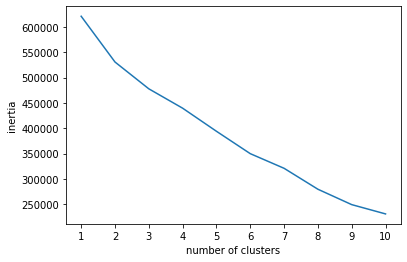

In [49]:
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show


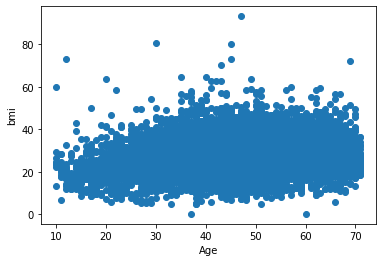

In [55]:
# Make a scatterplot with these features and color code it based on the cluster.


# Visualize data
plt.scatter(df['age'], df['bmi'])
plt.xlabel('Age')
plt.ylabel('bmi');

In [56]:
# Investigate each of the clusters. For example: What is the minimum and maximum income for each cluster?

# Instantiate KMeans
kmeans = KMeans(n_clusters = 7,random_state =42)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters)
kmeans.fit(scaled_df_clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
df_clusters.head()

,age,weight_lbs,height_inches,bmi_descript_Extremely Obese,bmi_descript_Normal,bmi_descript_Obese,bmi_descript_Overweight,bmi_descript_Underweight,age_brackets_20s,age_brackets_30s,age_brackets_40s,age_brackets_50s,age_brackets_60s,age_brackets_Over 70,gender_Female,gender_Male,cluster
_id,,,,,,,,,,,,,,,,,
60359822b9d47ea04970c156,37,149,748,0,0,0,0,1,0,1,0,0,0,0,0,1,0
532a10486882f3c50900e2f2,60,2,68,0,0,0,0,1,0,0,0,0,1,0,0,1,3
542473054698151763c7daf4,51,77,108,0,0,0,0,1,0,0,0,1,0,0,1,0,3
53d4244dedf38dfe09845a9d,38,77,108,0,0,0,0,1,0,1,0,0,0,0,1,0,3
53c31018973db4e650e2d331,33,77,108,0,0,0,0,1,0,1,0,0,0,0,0,1,3


In [58]:
# Save the cluster lables to the dataframe 
df_clusters['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df_clusters['age'], df_clusters['bmi_descript'], c = df_clusters['cluster'])
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('annual income vs spending score');

KeyError: ignored

In [ ]:
# Save the cluster lables to the dataframe 
df_clusters['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df_clusters['bmi_descript'], df_clusters['age'], c = df_clusters['cluster'])
plt.xlabel('bmi_descript')
plt.ylabel('age')
plt.title('annual income vs spending score');

In [ ]:
df_clusters['cluster'].value_counts()

In [59]:
seg1 = df_clusters[df_clusters['cluster']==0]
seg2 = df_clusters[df_clusters['cluster']==1]
seg3 = df_clusters[df_clusters['cluster']==2]
seg4 = df_clusters[df_clusters['cluster']==3]
seg5 = df_clusters[df_clusters['cluster']==4]
seg6 = df_clusters[df_clusters['cluster']==5]
seg7 = df_clusters[df_clusters['cluster']==6]


In [60]:
cust_segs = [seg1, seg2, seg3, seg4, seg5, seg6, seg7]
for segment in cust_segs:
  print(segment.describe().T)

                               count        mean  ...    75%    max
age                           8514.0   44.714235  ...   47.0   49.0
weight_lbs                    8514.0  181.322293  ...  200.0  495.0
height_inches                 8514.0   70.837209  ...   73.0  108.0
bmi_descript_Extremely Obese  8514.0    0.000000  ...    0.0    0.0
bmi_descript_Normal           8514.0    0.467230  ...    1.0    1.0
bmi_descript_Obese            8514.0    0.122856  ...    0.0    1.0
bmi_descript_Overweight       8514.0    0.385483  ...    1.0    1.0
bmi_descript_Underweight      8514.0    0.024430  ...    0.0    1.0
age_brackets_20s              8514.0    0.000000  ...    0.0    0.0
age_brackets_30s              8514.0    0.000000  ...    0.0    0.0
age_brackets_40s              8514.0    1.000000  ...    1.0    1.0
age_brackets_50s              8514.0    0.000000  ...    0.0    0.0
age_brackets_60s              8514.0    0.000000  ...    0.0    0.0
age_brackets_Over 70          8514.0    0.000000

In [ ]:


df_clusters.to_csv('/content/drive/MyDrive/PTDataScience/assignments/project.csv',index=False)